# Create ROC
This notebook creates the ROC curve (Figure 5).

Requires the CAD model output from `run_CAD_on_data.ipynb`, also available as `*_results.csv` files within each dataset directory.

Text(0.5, 0, 'False Positive Rate')

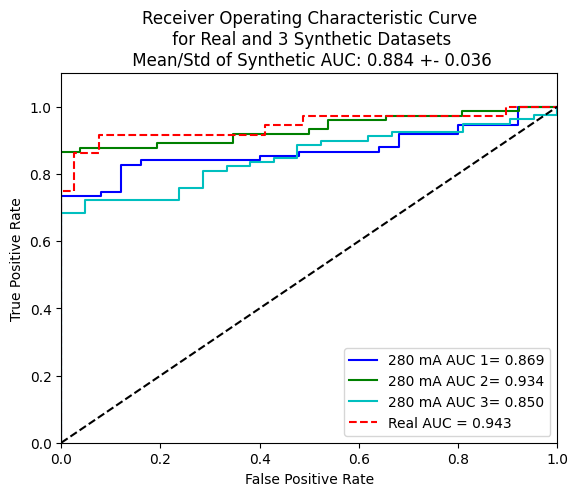

In [1]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# read in Hssayeni results
df = pd.read_csv('../datasets/real_dataset_predictions.csv')

results_real = df[["Any_ICH", "Model_Output"]].to_numpy()
results_real = results_real[~np.isnan(results_real).any(axis=1), :] # remove rows with nan (no CT images)

labels_real = results_real[:, 0]
pred_real = results_real[:, 1]

fpr_real, tpr_real, thresholds_real = metrics.roc_curve(labels_real, pred_real, pos_label=1)
roc_df_real = pd.DataFrame(zip(fpr_real, tpr_real, thresholds_real),columns = ["FPR","TPR","Threshold"])

roc_auc = metrics.auc(fpr_real, tpr_real)

#dataset_path = Path('../datasets')
#dataset_path = Path('/projects01/didsr-aiml/jayse.weaver/insilicoich/')
#dataset_names = ['mA_280_run1']
#dataset_names = ['mA_280_run1', 'mA_280_run2', 'mA_280_run3']

# read in synthetic results
ds1 = pd.read_csv('/projects01/didsr-aiml/jayse.weaver/insilicoich/mA_280_run1/mA_280_run1_results.csv')
fpr_ds1, tpr_ds1, thresh_ds1 = metrics.roc_curve(ds1['truth'], ds1['pred'], pos_label=1)
auc_ds1 = metrics.auc(fpr_ds1, tpr_ds1)

ds2 = pd.read_csv('/projects01/didsr-aiml/jayse.weaver/insilicoich/mA_280_run2/mA_280_run2_results.csv')
fpr_ds2, tpr_ds2, thresh_ds2 = metrics.roc_curve(ds2['truth'], ds2['pred'], pos_label=1)
auc_ds2 = metrics.auc(fpr_ds2, tpr_ds2)

ds3 = pd.read_csv('/projects01/didsr-aiml/jayse.weaver/insilicoich/mA_280_run3/mA_280_run3_results.csv')
fpr_ds3, tpr_ds3, thresh_ds3 = metrics.roc_curve(ds3['truth'], ds3['pred'], pos_label=1)
auc_ds3 = metrics.auc(fpr_ds3, tpr_ds3)

auc = [auc_ds1, auc_ds2, auc_ds3]

# Plot separate ROC for each synthetic dataset
plt.title('Receiver Operating Characteristic Curve\n for Real and 3 Synthetic Datasets\n Mean/Std of Synthetic AUC: %0.3f +- %0.3f' % (np.mean(auc) , np.std(auc)))
#plt.plot(fpr_ds0, tpr_ds0, 'co-', label = 'Syn DS0 AUC = %0.5f' % auc_ds0, color='c')

# ploit three synthetic ROC
plt.plot(fpr_ds1, tpr_ds1, '-', label = '280 mA AUC 1= %0.3f' % auc_ds1, color='blue', markersize=5)
plt.plot(fpr_ds2, tpr_ds2, '-', label = '280 mA AUC 2= %0.3f' % auc_ds2, color='green', markersize=5)
plt.plot(fpr_ds3, tpr_ds3, '-', label = '280 mA AUC 3= %0.3f' % auc_ds3, color='c', markersize=5)

#plot real ROC
plt.plot(fpr_real, tpr_real, '--', label = 'Real AUC = %0.3f' % roc_auc, color='red', markersize=5)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


/tmp/ipykernel_2117238/1080866087.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "co-" (-> color='c'). The keyword argument will take precedence.
  plt.plot(fpr_real, tpr_real, 'co-', label = 'Real AUC = %0.3f' % roc_auc, color='orange', markersize=0)


(0.0, 1.0)

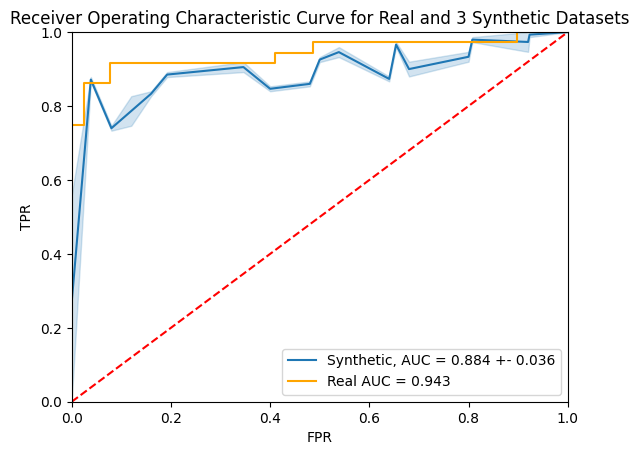

In [2]:
## Combine the three synthetic datasets into one ROC
syn_string = 'Synthetic, AUC = %0.3f +- %0.3f' % (np.mean(auc) , np.std(auc))
real_string = 'Real, AUC = %0.3f' % roc_auc

ds1_roc = pd.DataFrame(zip(fpr_ds1, tpr_ds1, thresh_ds1),columns = ["FPR","TPR","Threshold"])
ds1_roc['DS_ID'] = 'DS1'
ds1_roc['Dataset Type'] = syn_string
ds2_roc = pd.DataFrame(zip(fpr_ds2, tpr_ds2, thresh_ds2),columns = ["FPR","TPR","Threshold"])
ds2_roc['DS_ID'] = 'DS2'
ds2_roc['Dataset Type'] = syn_string
ds3_roc = pd.DataFrame(zip(fpr_ds3, tpr_ds3, thresh_ds3),columns = ["FPR","TPR","Threshold"])
ds3_roc['DS_ID'] = 'DS3'
ds3_roc['DS_TYPE'] = syn_string

roc_df_real['Dataset Type'] = real_string
roc_df_real['DS_ID'] = 'Real1'

all_roc = pd.concat([ds1_roc, ds2_roc, ds3_roc])

import seaborn as sns
plt.figure()
plt.title('Receiver Operating Characteristic Curve for Real and 3 Synthetic Datasets')
ax = sns.lineplot(data=all_roc, x='FPR', y='TPR', hue='Dataset Type')
plt.plot(fpr_real, tpr_real, 'co-', label = 'Real AUC = %0.3f' % roc_auc, color='orange', markersize=0)
ax.legend()
sns.move_legend(ax, "lower right")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])